In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('LoanPrediction.csv')
test = pd.read_csv('testloanpred.csv')

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
numerical_columns = train.select_dtypes(include=[np.number])
numerical_columns.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

UNIVARIATE ANALYSIS

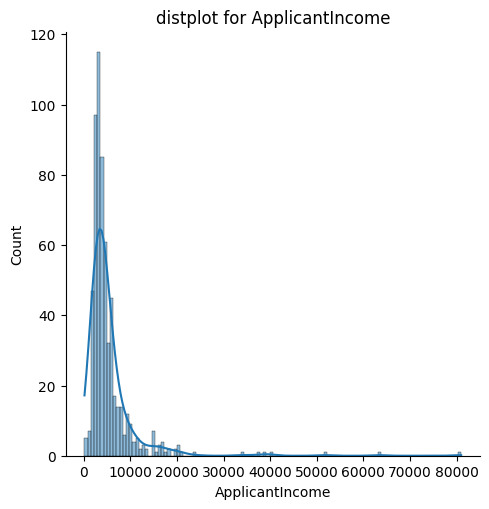

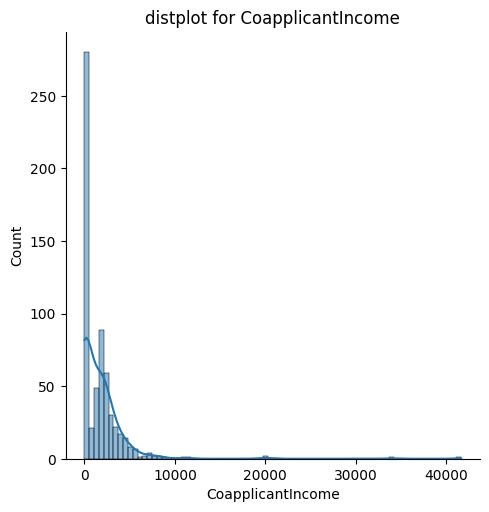

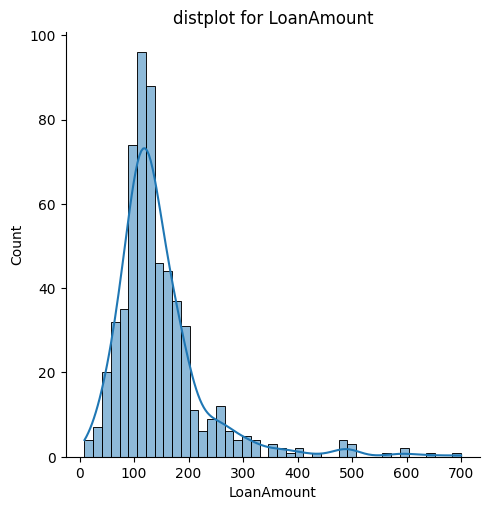

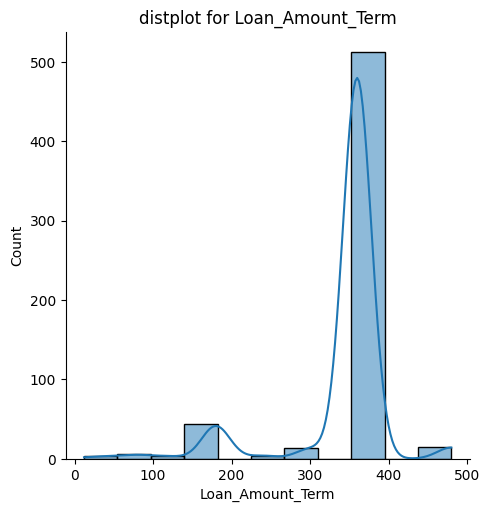

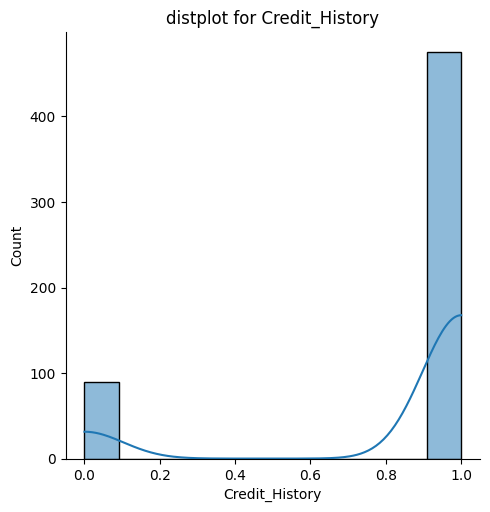

In [ ]:
for i in numerical_columns:
  sns.displot(train[i],kde=True)
  plt.title(f"distplot for {i}")


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

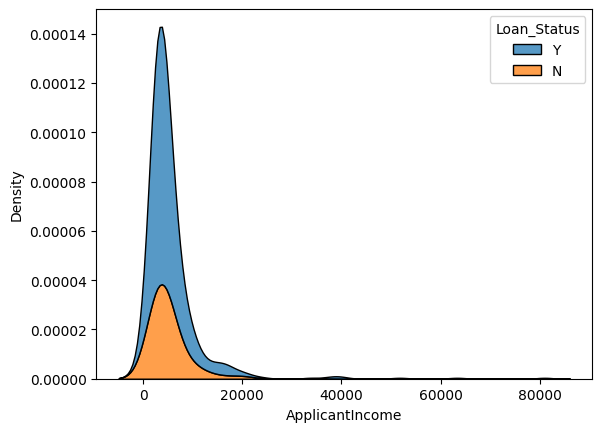

In [ ]:
sns.kdeplot(data=train, x='ApplicantIncome',hue='Loan_Status',multiple='stack')

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

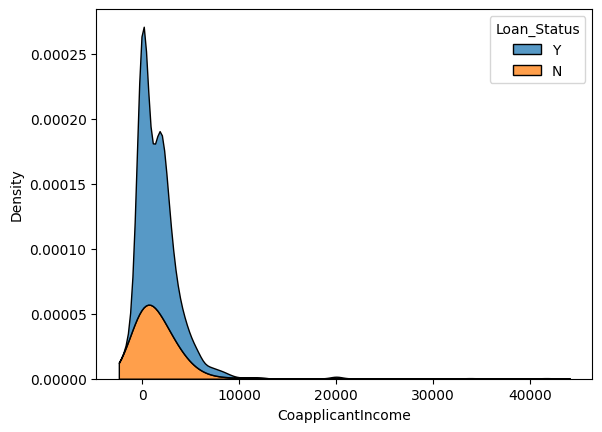

In [ ]:
sns.kdeplot(data = train,x='CoapplicantIncome',hue='Loan_Status',multiple='stack')

<Axes: xlabel='LoanAmount', ylabel='Density'>

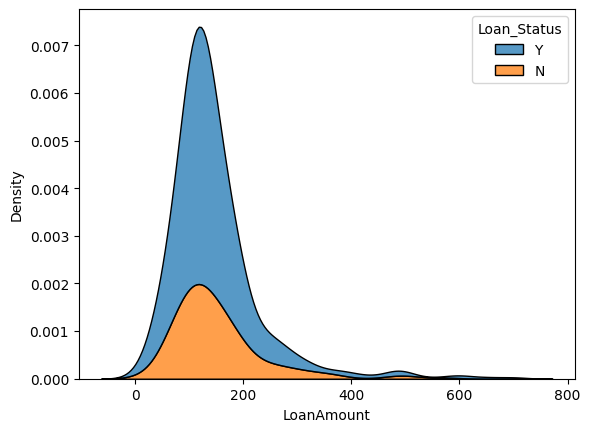

In [ ]:
sns.kdeplot(data = train,x='LoanAmount',hue='Loan_Status',multiple='stack')

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

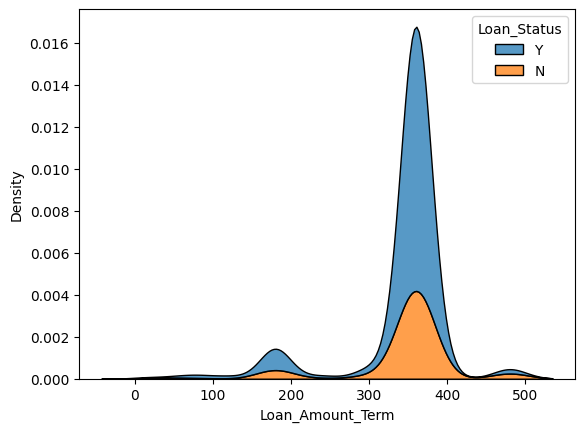

In [ ]:
sns.kdeplot(data = train,x='Loan_Amount_Term',hue='Loan_Status',multiple='stack')

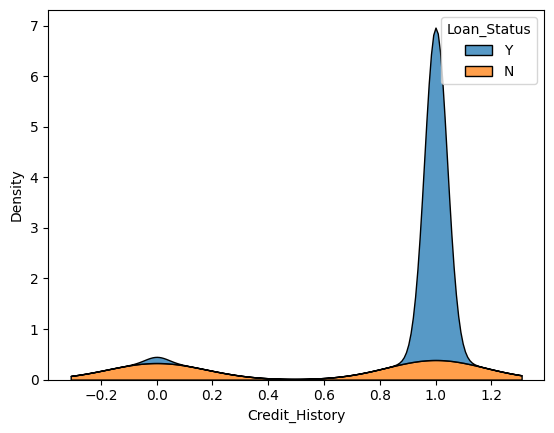

In [ ]:
if i in numerical_columns:
  sns.kdeplot(x=train[i],hue=train['Loan_Status'],multiple='stack')
plt.show()

In [ ]:
 categ_var = train.select_dtypes(include=[object])
 categ_var.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

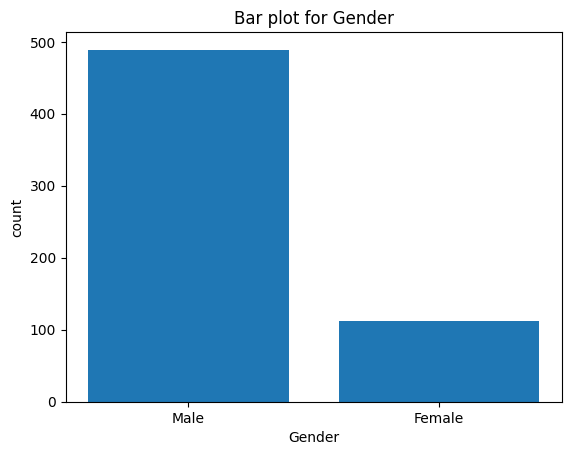

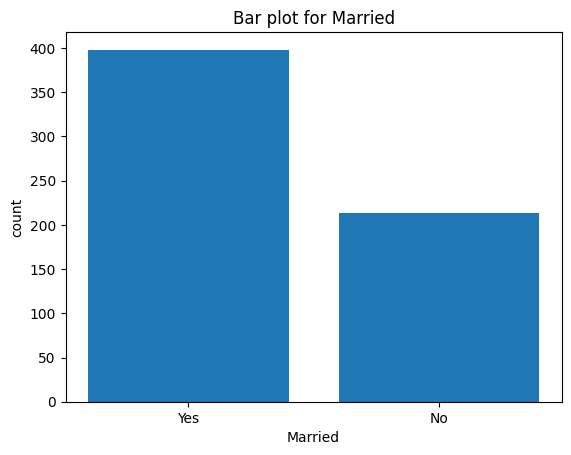

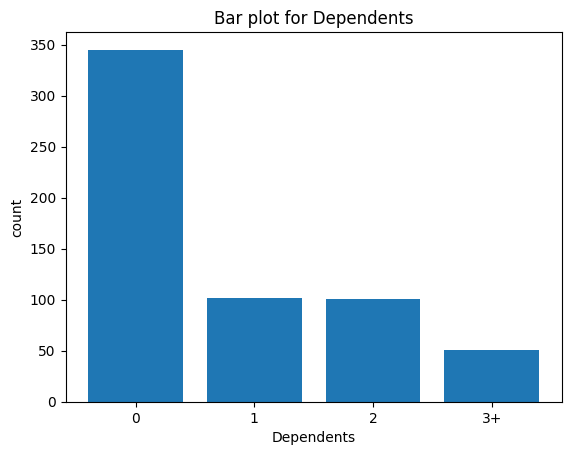

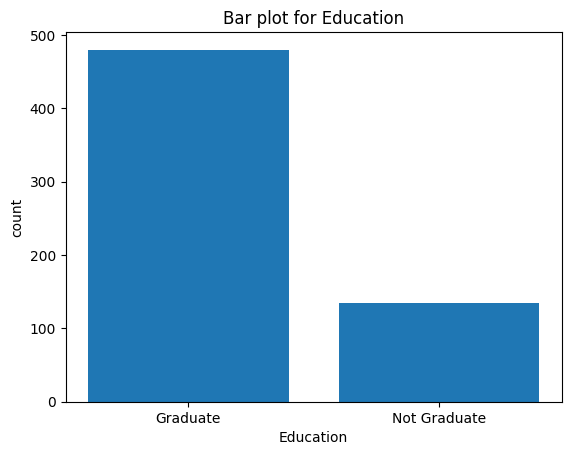

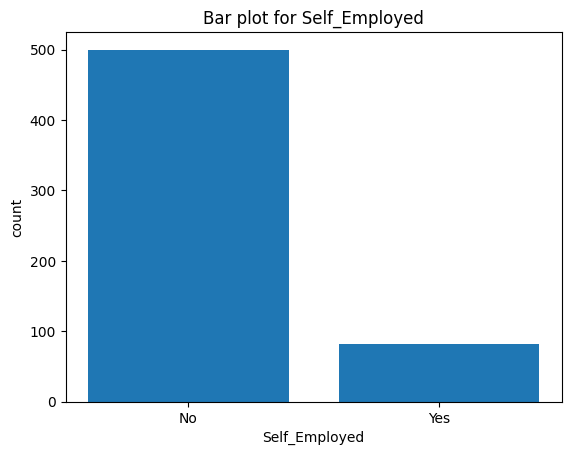

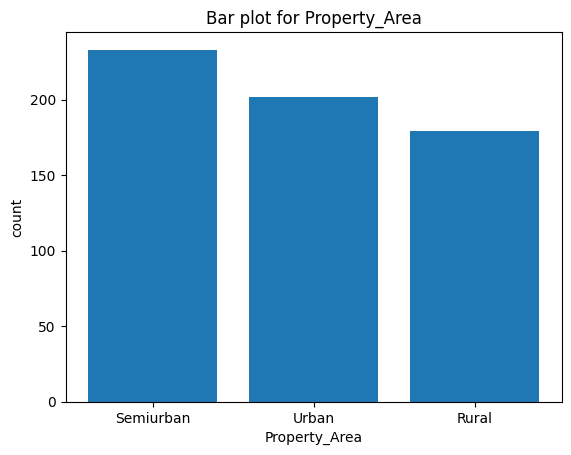

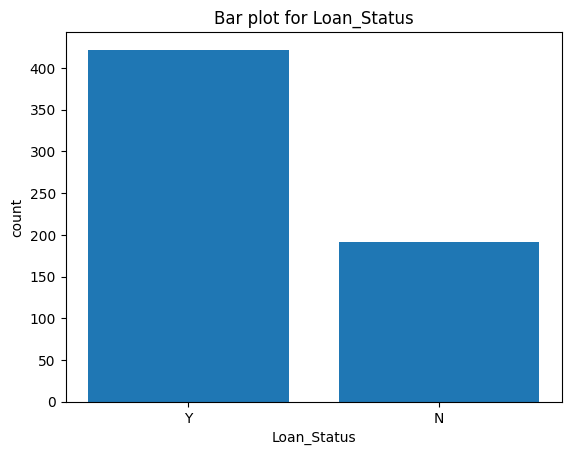

In [ ]:
for i in categ_var:

  if i != 'Loan_ID':
    plt.bar(train[i].value_counts().index,train[i].value_counts().values)
    plt.title(f"Bar plot for {i}")
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

<ipython-input-15-8ae1bc75c7f8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

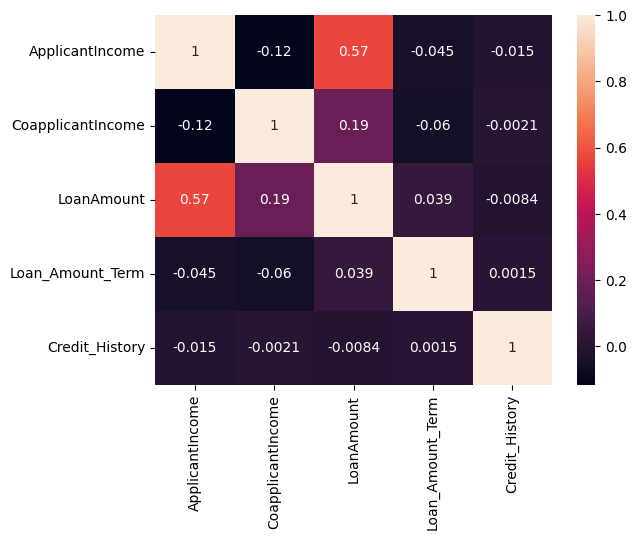

In [ ]:
sns.heatmap(train.corr(),annot=True)

Null Hypothesis : gender and loan status are independent

Alternative hypothesis :gender and loan status are dependent

In [ ]:
def chi2(var1,var2):
  table = pd.crosstab(var1,var2)
  _,p,_,_ = chi2_contingency(table)
  print(p)

  if p < 0.05:
    print("accept alternate hypothesis",round(p,2))
  else:
    print("fail to reject null hypothesis",round(p,2))
  return table


In [ ]:
chi2(train['Gender'],train['Loan_Status'])

0.7086529816451106
fail to reject null hypothesis 0.71


Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [ ]:
chi2(train['Married'],train['Loan_Status'])

0.03439381301579988
accept alternate hypothesis 0.03


Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


In [ ]:
chi2(train['Dependents'],train['Loan_Status'])

0.3678506740863211
fail to reject null hypothesis 0.37


Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


In [ ]:
chi2(train['Education'],train['Loan_Status'])

0.04309962129357355
accept alternate hypothesis 0.04


Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


In [ ]:
chi2(train['Self_Employed'],train['Loan_Status'])

1.0
fail to reject null hypothesis 1.0


Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


In [ ]:
chi2(train['Property_Area'],train['Loan_Status'])

0.0021360187811644937
accept alternate hypothesis 0.0


Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


# Data Preparation

In [ ]:
def data_prep(data):
  data['Gender'] = np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True)[0],data['Gender'])
  data['Married'] = np.where(data['Married'].isna(),data['Married'].mode(dropna=True)[0],data['Married'])
  data['Dependents'] = np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True)[0],data['Dependents'])
  data['Dependents'].replace('3+',3,inplace=True)
  data['Self_Employed'] = np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True)[0],data['Self_Employed'])
  data['LoanAmount'] = np.where(data['LoanAmount'].isna(),data['LoanAmount'].median(skipna=True),data['LoanAmount'])
  data['Loan_Amount_Term'] = np.where(data['Loan_Amount_Term'].isna(),data['Loan_Amount_Term'].median(skipna=True),data['Loan_Amount_Term'])
  data['Credit_History'] = np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True)[0],data['Credit_History'])
  data['Credit_History'] = data['Credit_History'].astype(int)
  data['Dependents'] = data['Dependents'].astype(int)

  return data

In [ ]:
for i in data.columns:
  if data[i].dtypes=='object':
    data[i] = np.where(data[i].isna(),data[i].mode(dropna=True)[0],data[i])


NameError: name 'data' is not defined

In [ ]:
data_prep(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [ ]:
def encoder(data):
  le = LabelEncoder()
  for i in data.columns:
    if data[i].dtypes == 'object':
      data[i] = le.fit_transform(data[i])
  return data

In [ ]:
encoder(train)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1


In [ ]:
x = train.drop(['Loan_ID','Loan_Status'],axis=1)
y = train['Loan_Status']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(491, 11)
(123, 11)
(491,)
(123,)


# Logistic Regression Model

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
logreg.coef_

array([[ 6.26281359e-02,  4.17076622e-01, -9.45258072e-02,
        -4.15246638e-01, -1.46677090e-01, -1.41674766e-05,
        -3.84079290e-05, -5.50042888e-04, -5.04706935e-03,
         2.93027512e+00,  6.02247019e-02]])

In [ ]:
logreg.intercept_

array([0.15680039])

In [ ]:
for i, coef in enumerate(logreg.coef_):
    for feature, value in zip(xtrain.columns, coef):
        print(f"Class {i+1}, {feature}: {value:.4f}")


Class 1, Gender: 0.0626
Class 1, Married: 0.4171
Class 1, Dependents: -0.0945
Class 1, Education: -0.4152
Class 1, Self_Employed: -0.1467
Class 1, ApplicantIncome: -0.0000
Class 1, CoapplicantIncome: -0.0000
Class 1, LoanAmount: -0.0006
Class 1, Loan_Amount_Term: -0.0050
Class 1, Credit_History: 2.9303
Class 1, Property_Area: 0.0602


In [ ]:
prob_train = logreg.predict_proba(xtrain)
prob_train

array([[0.23013761, 0.76986239],
       [0.24879764, 0.75120236],
       [0.19489219, 0.80510781],
       [0.28187963, 0.71812037],
       [0.82532771, 0.17467229],
       [0.35873697, 0.64126303],
       [0.16331826, 0.83668174],
       [0.27134771, 0.72865229],
       [0.20375317, 0.79624683],
       [0.85047303, 0.14952697],
       [0.18355825, 0.81644175],
       [0.21176423, 0.78823577],
       [0.25521841, 0.74478159],
       [0.85161945, 0.14838055],
       [0.27220591, 0.72779409],
       [0.21971569, 0.78028431],
       [0.17865274, 0.82134726],
       [0.17355012, 0.82644988],
       [0.16915521, 0.83084479],
       [0.21458646, 0.78541354],
       [0.17796859, 0.82203141],
       [0.23620395, 0.76379605],
       [0.25256156, 0.74743844],
       [0.80091623, 0.19908377],
       [0.75270908, 0.24729092],
       [0.21975381, 0.78024619],
       [0.21480025, 0.78519975],
       [0.84758733, 0.15241267],
       [0.25985822, 0.74014178],
       [0.1674259 , 0.8325741 ],
       [0.

In [ ]:
y_hat_train = logreg.predict(xtrain)
y_hat_test = logreg.predict(xtest)

In [ ]:
y_hat_train

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
ytrain

579    1
199    0
266    1
309    1
589    0
      ..
98     1
322    1
382    1
365    0
510    0
Name: Loan_Status, Length: 491, dtype: int64

In [ ]:
conf_matrix_train = confusion_matrix(ytrain,y_hat_train)
conf_matrix_train

array([[ 65,  85],
       [  5, 336]])

In [ ]:
conf_matrix_test = confusion_matrix(ytest,y_hat_test)
conf_matrix_test

array([[17, 25],
       [ 2, 79]])

In [ ]:
print("Accuracy for the train data:",accuracy_score(ytrain,y_hat_train))

Accuracy for the train data: 0.8167006109979633


In [ ]:
print("Accuracy for the test data:",accuracy_score(ytest,y_hat_test))

Accuracy for the test data: 0.7804878048780488


In [ ]:
print(classification_report(ytrain,y_hat_train))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491



In [ ]:
print(classification_report(ytest,y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123



# Decisiom Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5,min_samples_leaf=4,max_leaf_nodes=5,max_features=8)

#fit he model
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, max_features=8, max_leaf_nodes=5,
                       min_samples_leaf=4)

In [ ]:
y_hat_train = dtree.predict(xtrain)
y_hat_test = dtree.predict(xtest)

In [ ]:
print("Accuracy for the train data:",accuracy_score(ytrain,y_hat_train))

Accuracy for the train data: 0.8167006109979633


In [ ]:
print("Accuracy for the test data:",accuracy_score(ytest,y_hat_test))

Accuracy for the test data: 0.7804878048780488


In [ ]:
def model_prob(actual,predicted):
  confusion_mat = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  acc_score = accuracy_score(actual,predicted)
  print('accuracy of the model:',round(acc_score,2))
  print(class_rep)
  print(confusion_mat)

In [ ]:
model_prob(ytrain,y_hat_train)

accuracy of the model: 0.82
              precision    recall  f1-score   support

           0       0.93      0.43      0.59       150
           1       0.80      0.99      0.88       341

    accuracy                           0.82       491
   macro avg       0.86      0.71      0.74       491
weighted avg       0.84      0.82      0.79       491

[[ 65  85]
 [  5 336]]


In [ ]:
model_prob(ytest,y_hat_test)

accuracy of the model: 0.78
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123

[[17 25]
 [ 2 79]]


In [ ]:
xtrain.columns[9]

'Credit_History'

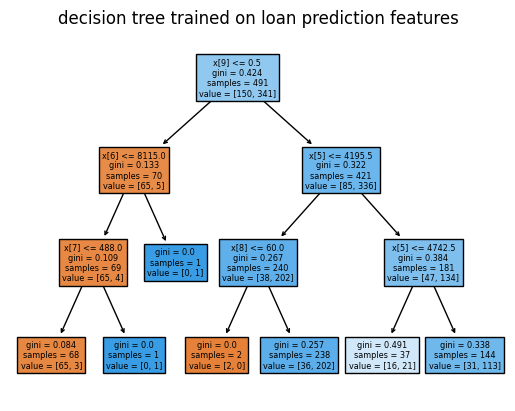

In [ ]:
from sklearn.tree import plot_tree

clasif = DecisionTreeClassifier(max_depth=3).fit(xtrain,ytrain)
plot_tree(clasif,filled=True)
plt.title("decision tree trained on loan prediction features")
plt.show()

In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
Credit_History,0.933644
LoanAmount,0.048851
CoapplicantIncome,0.017506
Gender,0.000000
Married,0.000000
Dependents,0.000000
Education,0.000000
Self_Employed,0.000000
ApplicantIncome,0.000000
Loan_Amount_Term,0.000000


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=200,max_depth=5,verbose=1,oob_score=True)
rfc.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.4s


RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True, verbose=1)

In [ ]:
y_hat_randomtrain = rfc.predict(xtrain)
y_hat_randomtest = rfc.predict(xtest)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.0s


In [ ]:
model_prob(ytrain,y_hat_randomtrain)

accuracy of the model: 0.82
              precision    recall  f1-score   support

           0       0.96      0.44      0.60       150
           1       0.80      0.99      0.89       341

    accuracy                           0.82       491
   macro avg       0.88      0.72      0.74       491
weighted avg       0.85      0.82      0.80       491

[[ 66  84]
 [  3 338]]


In [ ]:
model_prob(ytest,y_hat_randomtest)

accuracy of the model: 0.78
              precision    recall  f1-score   support

           0       0.89      0.40      0.56        42
           1       0.76      0.98      0.85        81

    accuracy                           0.78       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.81      0.78      0.75       123

[[17 25]
 [ 2 79]]


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    int64  
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 34.5 KB


In [ ]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural


In [ ]:
encoder(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,5720,0,110.0,360.0,1,2
1,1,1,1,1,0,0,3076,1500,126.0,360.0,1,2
2,2,1,1,2,0,0,5000,1800,208.0,360.0,1,2
3,3,1,1,2,0,0,2340,2546,100.0,360.0,1,2
4,4,1,0,0,1,0,3276,0,78.0,360.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,1,3,1,1,4009,1777,113.0,360.0,1,2
363,363,1,1,0,0,0,4158,709,115.0,360.0,1,2
364,364,1,0,0,0,0,3250,1993,126.0,360.0,1,1
365,365,1,1,0,0,0,5000,2393,158.0,360.0,1,0


In [ ]:
test.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
test_pred = logreg.predict(test)

In [ ]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
submission = pd.read_csv('sample_submission.csv')

In [ ]:
submission['Loan_Status'] = test_pred

In [ ]:
submission['Loan_Status'].replace({1:'Y',0:'N'},inplace=True)

In [ ]:
submission.to_csv('final_submission.csv',index=False)

In [ ]:
test_rf_predict = rfc.predict(test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


In [ ]:
test_rf_predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,